1) 
a) MDP = Markov Decision Process
b) states are finite and include all past information that make a difference for the future
c) All states, actions and rewards are finite & the agent-environment boundary represents the limit of the agents absolute control

2) Bellman Gleichung:
Es wird die Summe aller Aktionen a (gegeben States s) mit allen Wahrscheinlichkeiten der Folgestatus und Rewards multipliziert

3) Gains

In [19]:
import numpy as np

In [107]:
ROWS = 5
COLS = 5
ACTIONS = ["up", "down", "left", "right"]

class State():
    def __init__(self, row, col):
        self.row = row
        self.col = col
        
A = State(0, 1)
A_next = State(4, 1)
B = State(0, 3)
B_next = State(2, 3)
        
def get_reward_and_new_state(state: State, action: str):
    # process next_state
    moved_out_of_bounds = False
    if action == "up":
        if state.row == 0:
            next_state = state
            moved_out_of_bounds = True
        else:
            next_state = State(state.row - 1, state.col)
    elif action == "down":
        if state.row == ROWS - 1:
            next_state = state
            moved_out_of_bounds = True
        else:
            next_state = State(state.row + 1, state.col)
    elif action == "left":
        if state.col == 0:
            next_state = state
            moved_out_of_bounds = True
        else:
            next_state = State(state.row, state.col - 1)
    elif action == "right":
        if state.col == COLS - 1:
            next_state = state
            moved_out_of_bounds = True
        else:
            next_state = State(state.row, state.col + 1)
    else:
        raise("invalid action")
    # process reward
    if state.col == A.col and state.row == A.row:
        next_state = A_next
        reward = 10
    elif state.col == B.col and state.row == B.row:
        next_state = B_next
        reward = 5
    elif moved_out_of_bounds:
        reward = -1
    else:
        reward = 0
    return reward, next_state

class ValueTable():
    def __init__(self):
        self.values = np.zeros((ROWS, COLS), dtype=float)
        
    def get_value(self, state: State):
        return self.values[state.row][state.col]
    def set_value(self, state: State, value: float):
        self.values[state.row][state.col] = value
    def print(self):
        print(self.values)
    def calc_diff(self, vt: ValueTable):
        return abs(pow(vt.sum(), 2) - pow(self.values.sum(), 2))
        

In [111]:
# Define Model
GAMMA = 0.9
THETA = 0.1
PERFECT_VT = np.array([[ 3.30899634,  8.78929186,  4.42761918,  5.32236759,  1.49217876],
 [ 1.52158807,  2.99231786,  2.25013995,  1.9075717,   0.54740271],
 [ 0.05082249,  0.73817059,  0.67311326,  0.35818621, -0.40314114],
 [-0.9735923,  -0.43549543, -0.35488227, -0.58560509, -1.18307508],
 [-1.85770055, -1.34523126, -1.22926726, -1.42291815, -1.97517905]])

STATES = []
for row in range(0, ROWS):
    for col in range(0, COLS):
        STATES.append(State(row, col))

UNIFORM_POLICY = np.ones((ROWS, COLS)) / len(ACTIONS)

def get_policy(state: State, action: str):
    return UNIFORM_POLICY[state.row][state.col]
        
def bellmann_expectations(curr_vt: ValueTable):
    new_vt = ValueTable()
    for state in STATES:
        rewards_for_this_state = 0
        for action in ACTIONS:
            # Get reward from environment
            reward, new_state = get_reward_and_new_state(state=state, action=action)
            rewards_for_this_state += get_policy(state, action) * (reward + curr_vt.get_value(new_state) * GAMMA)
            #print(f"State({state.row},{state.col}) == {action} ==> New State({new_state.row},{new_state.col}), reward:{reward}")
        #print(f"New value: {rewards_for_this_state}")
        new_vt.set_value(state, rewards_for_this_state)
    return new_vt

#def propability(curr_vt: ValueTable, next_state: State, reward: float, curr_state: State, action: str):

In [112]:
# For testing environment
reward, state = get_reward_and_new_state(State(0, 1), "up")
print(state.row, state.col, reward)

vt = ValueTable()
vt.print()
vt.set_value(State(0, 1), 5.0)
vt.print()

print(get_policy(State(1,2), "up"))
print(get_policy(State(0,4), "left"))

4 1 10
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.25
0.25


In [115]:
vt = ValueTable()
vt.print()
iterations = []
diffs = []
for iteration in range(0, 100):
    print(f"### Iteration {iteration} ###")
    vt = bellmann_expectations(vt)
    diff = vt.calc_diff(PERFECT_VT)
    print(f"# Diff: {diff}")
    iterations.append(iteration)
    diffs.append(diff)
    if diff < THETA:
        print(f"Threshold reached. Finished!")
        break
    vt.print()



[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
### Iteration 0 ###
# Diff: 401.1284774627674
[[-0.5  10.   -0.25  5.   -0.5 ]
 [-0.25  0.    0.    0.   -0.25]
 [-0.25  0.    0.    0.   -0.25]
 [-0.25  0.    0.    0.   -0.25]
 [-0.5  -0.25 -0.25 -0.25 -0.5 ]]
### Iteration 1 ###
# Diff: 232.9058212127673
[[ 1.46875  9.775    3.06875  5.       0.34375]
 [-0.475    2.19375 -0.05625  1.06875 -0.475  ]
 [-0.41875 -0.05625  0.      -0.05625 -0.41875]
 [-0.475   -0.1125  -0.05625 -0.1125  -0.475  ]
 [-0.8375  -0.475   -0.41875 -0.475   -0.8375 ]]
### Iteration 2 ###
# Diff: 142.99043439636108
[[ 2.2534375   9.5725      3.7521875   4.949375    0.6728125 ]
 [ 0.37296875  2.0671875   1.42453125  0.9928125  -0.13328125]
 [-0.570625    0.3740625  -0.050625    0.1209375  -0.570625  ]
 [-0.66484375 -0.2390625  -0.14484375 -0.2390625  -0.66484375]
 [-1.090625   -0.66484375 -0.570625   -0.66484375 -1.090625  ]]
### Iteration 3 ###
# Diff: 71.1439887203357
[[

In [114]:
delta = 0
while True:
    delta = 0
 
    
    
    if delta < THETA:
        break
# done?

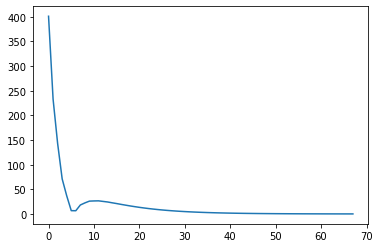

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(iterations, diffs)